In [32]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tmdbsimple as tmdb
import requests
import pandas as pd
import time
sns.set_context('poster')


In [33]:
key = open('key.txt','r').read()
payload = '{}'
url = "https://api.themoviedb.org/3/genre/movie/list?api_key={0}&language=en-US&page={1}".format(key, str(1))
response = requests.request("GET", url, data=payload).json()

genreDict = dict(zip([i['id'] for i in response['genres']],
                     [i['name'] for i in response['genres']]))
genreDict

{12: 'Adventure',
 14: 'Fantasy',
 16: 'Animation',
 18: 'Drama',
 27: 'Horror',
 28: 'Action',
 35: 'Comedy',
 36: 'History',
 37: 'Western',
 53: 'Thriller',
 80: 'Crime',
 99: 'Documentary',
 878: 'Science Fiction',
 9648: 'Mystery',
 10402: 'Music',
 10749: 'Romance',
 10751: 'Family',
 10752: 'War',
 10770: 'TV Movie'}

In [34]:
movies = pd.read_csv('Data/movie_df.csv', encoding='utf8')
movies.head(20)

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count
0,False,/9ywA15OAiwjSTvg3cBs9B7kOCBF.jpg,"[18, 10749]",337167,en,Fifty Shades Freed,Believing they have left behind shadowy figure...,566.277884,/jjPJ4s3DWZZvI4vw8Xfi4Vqa1Q8.jpg,2018-02-07,Fifty Shades Freed,False,6.1,1126
1,False,/mhdeE1yShHTaDbJVdWyTlzFvNkr.jpg,"[16, 12, 10751, 35]",269149,en,Zootopia,"Determined to prove herself, Officer Judy Hopp...",341.104188,/sM33SANp9z6rXW8Itn7NnG1GOEs.jpg,2016-02-11,Zootopia,False,7.7,6697
2,False,/ut3n6iLMF79vDqyKFU6PeojZZpQ.jpg,"[28, 12, 14, 878]",284054,en,Black Panther,King T'Challa returns home from America to the...,248.787619,/uxzzxijgPIY7slzFvMotPv8wjKA.jpg,2018-02-13,Black Panther,False,7.4,3599
3,False,/c4Dw37VZjBmObmJw9bmt8IDwMZH.jpg,"[28, 14, 12, 878]",181808,en,Star Wars: The Last Jedi,Rey develops her newly discovered abilities wi...,229.525757,/kOVEVeg59E0wsnXmF9nrh6OmWII.jpg,2017-12-13,Star Wars: The Last Jedi,False,7.1,4583
4,False,/askg3SMvhqEl4OL52YuvdtY40Yb.jpg,"[12, 35, 10751, 16]",354912,en,Coco,Despite his family’s baffling generations-old ...,210.050883,/eKi8dIrr8voobbaGzDpe8w0PVbC.jpg,2017-10-27,Coco,False,7.8,3474
5,False,/bLJTjfbZ1c5zSNiAvGYs1Uc82ir.jpg,"[28, 12]",338970,en,Tomb Raider,"Lara Croft, the fiercely independent daughter ...",196.317099,/ePyN2nX9t8SOl70eRW47Q29zUFO.jpg,2018-03-08,Tomb Raider,False,6.1,588
6,False,/kaIfm5ryEOwYg8mLbq8HkPuM1Fo.jpg,"[28, 12, 14]",284053,en,Thor: Ragnarok,Thor is imprisoned on the other side of the un...,154.964242,/rzRwTcFvttcN1ZpX2xv4j3tSdJu.jpg,2017-10-25,Thor: Ragnarok,False,7.4,5210
7,False,/jj8qgyrfQ12ZLZSY1PEbA3FRkfY.jpg,"[28, 14, 878, 12]",268896,en,Pacific Rim: Uprising,It has been ten years since The Battle of the ...,132.562564,/v5HlmJK9bdeHxN2QhaFP1ivjX3U.jpg,2018-03-21,Pacific Rim: Uprising,False,6.2,217
8,False,/5zfVNTrkhMu673zma6qhFzG01ig.jpg,"[9648, 878, 18]",300668,en,Annihilation,"A biologist signs up for a dangerous, secret e...",132.039336,/d3qcpfNwbAMCNqWDHzPQsUYiUgS.jpg,2018-02-22,Annihilation,False,6.4,1141
9,False,/zKZqtGKmysHNbmsJQWS51rywROw.jpg,"[18, 53, 28, 878]",347882,en,Sleight,A young street magician is left to take care o...,129.786218,/wridRvGxDqGldhzAIh3IcZhHT5F.jpg,2017-04-28,Sleight,False,5.2,288


In [35]:
movies.overview[6]

'Thor is imprisoned on the other side of the universe and finds himself in a race against time to get back to Asgard to stop Ragnarok, the prophecy of destruction to his homeworld and the end of Asgardian civilization, at the hands of an all-powerful new threat, the ruthless Hela.'

In [36]:
movies.describe()

,id,popularity,vote_average,vote_count
count,1004.000000,1004.000000,1004.000000,1004.000000
mean,88821.466135,29.172915,6.758765,2904.856574
std,132816.186748,27.031276,1.043058,2402.008369
min,11.000000,16.957023,0.000000,0.000000
25%,1366.750000,20.241937,6.300000,1346.750000
50%,10722.500000,23.727722,6.800000,2077.500000
75%,122908.750000,29.348949,7.400000,3758.000000
max,501689.000000,566.277884,10.000000,16669.000000


Text(0.5,1,'Average Movie Ratings in Dataset')

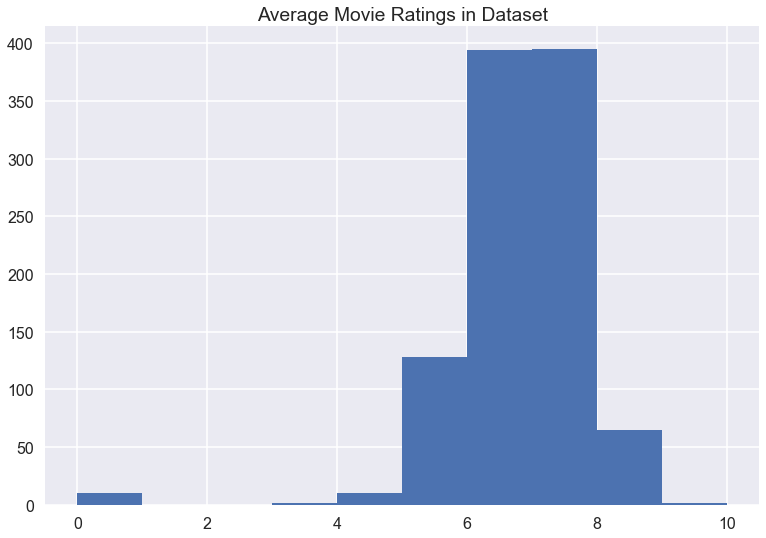

In [37]:
plt.hist(movies.vote_average)
plt.title('Movie Ratings in Dataset')

In [23]:
type(movies.release_date[0])

str

array(['[18, 80]', '[18, 36, 10752]', '[18, 9648]', '[18]',
       '[12, 878, 28]', '[53, 80]', '[18, 878]', '[14, 18, 80]',
       '[18, 27, 53]', '[35, 18, 10749]', '[18, 28, 80, 53]',
       '[10751, 16, 10749, 35]', '[16, 18]', '[18, 9648, 878, 53, 10770]',
       '[878, 12]', '[10749, 18]', '[12, 28, 878]', '[12, 14, 28]',
       '[35]', '[18, 9648, 53]', '[18, 9648, 878, 53]', '[10751, 16]',
       '[80, 9648, 53]', '[18, 35]', '[18, 9648, 80]', '[18, 10752]',
       '[80, 18]', '[18, 10751]', '[28, 53, 878, 9648, 12]',
       '[80, 18, 53]', '[12, 18, 878]', '[18, 80, 53]', '[18, 10749]',
       '[9648, 53]', '[27, 53]', '[18, 53]', '[80, 53]',
       '[12, 35, 878, 10751]', '[28, 35, 9648]', '[9648, 10749, 53]',
       '[18, 10751, 14]', '[9648, 18]', '[27, 10402]', '[10751, 16, 14]',
       '[878, 18]', '[10751, 16, 18]', '[35, 10749]', '[18, 35, 10752]',
       '[28, 12, 35, 18]', '[18, 10402]', '[36, 18, 53, 10752]',
       '[28, 80, 18, 53]', '[80, 18, 9648, 53]', '[16, 107